# First we load in the libraries and set defaults


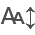

In [127]:
import pandas as pd
import numpy as np
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)
from itables import show
from PIL import Image
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.max_columns = None
pd.options.display.max_rows = 500

# Now we read in the data files

In [128]:
years=list(range(1991, 2017))

years=[str(x) + ".txt" for x in years]

In [129]:
years=["Elements " + s for s in years]
years = ["C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/" + s for s in years]
years

['C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1991.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1992.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1993.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1994.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1995.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1996.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1997.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1998.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1999.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2000.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2001.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2002.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2003.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/element

In [130]:
files = years + ["C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2017 MB 1-3.txt", "C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2017 MB 4.txt"]
files

['C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1991.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1992.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1993.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1994.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1995.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1996.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1997.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1998.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 1999.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2000.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2001.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2002.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/Elements 2003.txt',
 'C:/Users/carte/OneDrive/Documents/FDA/TDS/element

In [131]:
data_read = []

for file in files:
  data_read.append(pd.read_table(file, encoding = 'latin-1'))

data_read.append(pd.read_csv("C:/Users/carte/OneDrive/Documents/FDA/TDS/elements/2018_2020.csv"))

In [132]:
df = pd.concat(data_read)
df.shape

(429946, 37)

In [133]:
df.dtypes

MB                              float64
Food No.                        float64
Food Name                        object
Anal Type                        object
Sample Qualifier                 object
Replicate No.                    object
Element                          object
Conc                            float64
Unit                             object
Trace                            object
LOD                             float64
LOQ                             float64
Result Qualifier and Remarks     object
Method                           object
Instrument                       object
Batch ID                         object
METHOD                           object
Food No                         float64
ReplicateNo                      object
Reference Material               object
QC Level                         object
QC Unit                          object
QC% Recvd                        object
City ID                          object
Replicate No                    float64


# Summary of prompts entered into ChatGPT to help with coding:

# Exploring the data and doing some clean up

Fixing column names

In [134]:
df.columns = df.columns\
    .str.replace(" ", "_")\
    .str.replace(".", "_")\
    .str.replace("%", "_percent_")
df.columns

Index(['MB', 'Food_No_', 'Food_Name', 'Anal_Type', 'Sample_Qualifier',
       'Replicate_No_', 'Element', 'Conc', 'Unit', 'Trace', 'LOD', 'LOQ',
       'Result_Qualifier_and_Remarks', 'Method', 'Instrument', 'Batch_ID',
       'METHOD', 'Food_No', 'ReplicateNo', 'Reference_Material', 'QC_Level',
       'QC_Unit', 'QC_percent__Recvd', 'City_ID', 'Replicate_No', 'FiscalYear',
       'CalendarYear', 'Collection', 'TDSFoodNumber', 'TDSFoodDescription',
       'Season', 'TDSFoodListType', 'Region', 'Analyte', 'Units',
       'Concentration', 'ReportingLimit'],
      dtype='object')

Fixing Food_Name

In [135]:
df['Food_Name'] = df['Food_Name']\
    .str.replace('w/', 'with')\
    .str.upper()\
    .str.replace(', ', '_').str.upper()\
    .str.replace(' ', '_').str.upper()\
    .str.removesuffix('_')

#df['Food.Name'].unique()

From column key, we see the first four digits of MB are the year. The last two digits are the sepcific market basket. Let's extract this information

In [136]:
df['Year'] = df.MB.astype(str).str[:4].astype(float)

In [137]:
df['Market_Basket'] = df.MB.astype(str).str[-4:]

In [138]:
df.isnull().sum()

MB                               58079
Food_No_                         90743
Food_Name                        58079
Anal_Type                        58079
Sample_Qualifier                307204
Replicate_No_                   354905
Element                          58079
Conc                             58079
Unit                             58079
Trace                           370168
LOD                              59909
LOQ                              59909
Result_Qualifier_and_Remarks    319556
Method                          137807
Instrument                       58081
Batch_ID                        173749
METHOD                          350220
Food_No                         397282
ReplicateNo                     415226
Reference_Material              415226
QC_Level                        415226
QC_Unit                         415226
QC_percent__Recvd               415226
City_ID                         429833
Replicate_No                    429469
FiscalYear               

Let's get the Unit vs Units worked out

In [139]:
df['Unit']=df['Unit'].str.replace(' ', '')
df['Unit'].unique()

array(['mg/kg', '%', 'ug/kg', nan], dtype=object)

What are the null entries?
Trying to figure out if the difference in null units between Unit and Units

In [140]:
(pd.isnull(df['Units']) & pd.isnull(df['Unit'])).sum()

1

So there are is one row where Unit and Units are empty

In [141]:
df = df[~(pd.isnull(df['Units']) & pd.isnull(df['Unit']))].copy()

In [142]:
df.shape

(429945, 39)

In [143]:
pd.isnull(df['Units']).sum()

371867

In [144]:
pd.isnull(df['Unit']).sum()

58078

In [145]:
pd.isnull(df['Units']).sum() + pd.isnull(df['Unit']).sum()

429945

So we are going to simply substitute for Unit and drop ['Units']

In [146]:
def replace_null_with_column(df, col_a, col_b):
    df[col_a] = df.apply(lambda row: row[col_b] if pd.isnull(row[col_a]) else row[col_a], axis=1)
    return df

In [147]:
df = replace_null_with_column(df, 'Unit', 'Units')

In [148]:
pd.isnull(df['Unit']).sum()

0

In [149]:
df = df.drop(['Units'], axis = 1)

In [150]:
(pd.isnull(df['Conc']) & pd.isnull(df['Concentration'])).sum()

0

In [151]:
df['Conc'].isnull().sum()

58078

In [152]:
df['Concentration'].isnull().sum()

371867

In [153]:
df['Conc'].isnull().sum() + df['Concentration'].isnull().sum()

429945

So just like above we need to substitute for Conc

In [154]:
df = replace_null_with_column(df, 'Conc', 'Concentration')

In [155]:
df['Conc'].isnull().sum()

0

In [156]:
df = df.drop(['Concentration'], axis = 1)

In [157]:
df['Element'].isnull().sum()

58078

In [158]:
df['Analyte'].isnull().sum()

371867

In [159]:
df['Element'].isnull().sum() + df['Analyte'].isnull().sum()

429945

In [160]:
df = replace_null_with_column(df, 'Element', 'Analyte')

In [161]:
df = df.drop(['Analyte'], axis = 1)

In [162]:
df.columns

Index(['MB', 'Food_No_', 'Food_Name', 'Anal_Type', 'Sample_Qualifier',
       'Replicate_No_', 'Element', 'Conc', 'Unit', 'Trace', 'LOD', 'LOQ',
       'Result_Qualifier_and_Remarks', 'Method', 'Instrument', 'Batch_ID',
       'METHOD', 'Food_No', 'ReplicateNo', 'Reference_Material', 'QC_Level',
       'QC_Unit', 'QC_percent__Recvd', 'City_ID', 'Replicate_No', 'FiscalYear',
       'CalendarYear', 'Collection', 'TDSFoodNumber', 'TDSFoodDescription',
       'Season', 'TDSFoodListType', 'Region', 'ReportingLimit', 'Year',
       'Market_Basket'],
      dtype='object')

In [163]:
df.shape

(429945, 36)

Let's fix the food names and food ID

In [164]:
(df.Food_No.isnull() & df.Food_No_.isnull()).sum()

58078

In [165]:
df.Food_No.isnull().sum()

397281

In [166]:
df = replace_null_with_column(df, 'Food_No', 'Food_No_')

In [167]:
df.Food_No.isnull().sum()

58078

In [168]:
df = df.drop(['Food_No_'], axis = 1)

What are still missing

In [169]:
food_names_without_no = df[df.Food_No.isnull()].Food_Name.unique()

In [170]:
show(df[['Food_Name', "Food_No"]].drop_duplicates())

We are trying to figure out what food ID numbers arent in the range of 1 to food ID MAX

In [171]:
df.Food_No.isnull().sum()

58078

In [172]:
food_id_range = np.arange(1,
    df['Food_No']\
    .dropna()\
    .unique()\
    .max(),
    dtype='int')

So what Food IDs are not present?

In [173]:
food_ids_not_in_df = food_id_range[~np.isin(food_id_range, df['Food_No'].dropna().drop_duplicates())]
food_ids_not_in_df

array([  5,   9,  15,  23,  25,  31,  33,  40,  41,  43,  44,  45,  49,
        82,  90, 101, 102, 104, 106, 118, 120, 127, 129, 130, 133, 141,
       144, 150, 153, 154, 158, 159, 163, 165, 171, 174, 176, 180, 181,
       189, 192, 195, 204, 206, 217, 228, 229, 234, 315, 321, 322, 329,
       330, 349, 383, 384, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 52

In [174]:
food_name_ID = df[['Food_Name', "Food_No"]].drop_duplicates()
show(food_name_ID[~food_name_ID.Food_No.isnull()])

Let's now work on the units variable

In [175]:
df['Conc_mgkg'] = np.where(df['Unit']=="ug/kg", df['Conc']/1000, df['Conc'])
df['Conc_mgkg'] = np.where(df['Unit']=="ppb", df['Conc']/1000, df['Conc'])

In [176]:
df = df.drop(['Conc'], axis = 1)

In [177]:
df['Element']=df.Element.str.upper()
df['Element'].unique()

array(['ARSENIC', 'CADMIUM', 'CALCIUM', 'COPPER', 'IRON', 'LEAD',
       'MAGNESIUM', 'MERCURY', 'PHOSPHORUS', 'POTASSIUM', 'SELENIUM',
       'SODIUM', 'ZINC', 'MANGANESE', 'NICKEL', 'IODINE', 'ANTIMONY',
       'ALUMINUM', 'MOLYBDENUM', 'WATER (ANALYSIS FOR TOTAL DIET ONLY)',
       'BARIUM', 'BERYLLIUM', 'CHROMIUM', 'DIMETHYLARSINIC ACID ',
       'MONOMETHYLARSONIC ACID ', 'SILVER', 'THALLIUM',
       'TOTAL INORGANIC ARSENIC ', 'URANIUM', 'DIMETHYLARSINIC ACID',
       'MONOMETHYLARSONIC ACID', 'STRONTIUM', 'TOTAL INORGANIC ARSENIC',
       'VANADIUM', 'CALCIUM ', 'CHROMIUM ', 'COPPER ', 'IODINE ', 'IRON ',
       'MAGNESIUM ', 'MANGANESE ', 'MOLYBDENUM ', 'POTASSIUM ',
       'PHOSPHORUS ', 'SELENIUM ', 'SODIUM ', 'ZINC ', 'ARSENIC (TOTAL) ',
       'CADMIUM ', 'LEAD ', 'MERCURY ', 'NICKEL ', 'STRONTIUM ',
       'URANIUM ', 'VANADIUM ', 'ANTIMONY ', 'BARIUM ', 'BERYLLIUM ',
       'THALLIUM '], dtype=object)

So what are the percent units data

In [178]:
df_percent = df.query('Unit == "%"').copy()
show(df_percent)

Looks like all the % entries are water analysis. How is there conc_mgkg? It's just percent but didnt include that in the if else We want to filter for everything else.

In [179]:
df=df.query('Unit != "%"').copy()

In [180]:
elements = ['ARSENIC', 'CADMIUM', 'CALCIUM', 'COPPER', 'IRON', 'LEAD',
       'MAGNESIUM', 'PHOSPHORUS', 'POTASSIUM', 'SELENIUM', 'MERCURY',
       'SODIUM', 'ZINC', 'MANGANESE', 'NICKEL', 'MOLYBDENUM', 'BARIUM', 'CHROMIUM',

       'THALLIUM',
       'STRONTIUM',
       ]

In [181]:
elements

['ARSENIC',
 'CADMIUM',
 'CALCIUM',
 'COPPER',
 'IRON',
 'LEAD',
 'MAGNESIUM',
 'PHOSPHORUS',
 'POTASSIUM',
 'SELENIUM',
 'MERCURY',
 'SODIUM',
 'ZINC',
 'MANGANESE',
 'NICKEL',
 'MOLYBDENUM',
 'BARIUM',
 'CHROMIUM',
 'THALLIUM',
 'STRONTIUM']

And we filter down to include the elements of interest

In [182]:
df = df[df['Element'].isin(elements)].copy()

In [183]:
df.columns

Index(['MB', 'Food_Name', 'Anal_Type', 'Sample_Qualifier', 'Replicate_No_',
       'Element', 'Unit', 'Trace', 'LOD', 'LOQ',
       'Result_Qualifier_and_Remarks', 'Method', 'Instrument', 'Batch_ID',
       'METHOD', 'Food_No', 'ReplicateNo', 'Reference_Material', 'QC_Level',
       'QC_Unit', 'QC_percent__Recvd', 'City_ID', 'Replicate_No', 'FiscalYear',
       'CalendarYear', 'Collection', 'TDSFoodNumber', 'TDSFoodDescription',
       'Season', 'TDSFoodListType', 'Region', 'ReportingLimit', 'Year',
       'Market_Basket', 'Conc_mgkg'],
      dtype='object')

In [184]:
df.shape

(353956, 35)

To understand what the columns are referring to see https://www.fda.gov/food/fda-total-diet-study-tds/fda-total-diet-study-tds-results and https://www.fda.gov/media/93359/download?attachment

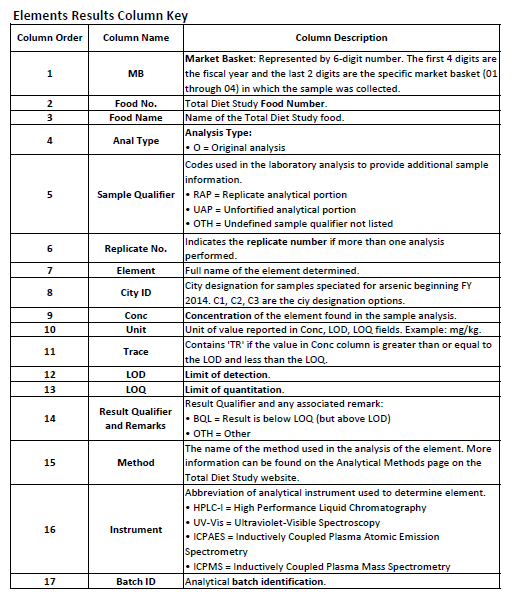

In [185]:
img = Image.open('C:/Users/carte/OneDrive/Documents/GitHub/FDA-TDS/elements_column_key.PNG')
display(img)

After working with the features let's see what is still missing in the data

In [186]:
df.isnull().sum()

MB                                   0
Food_Name                            0
Anal_Type                            0
Sample_Qualifier                241091
Replicate_No_                   284074
Element                              0
Unit                                 0
Trace                           298778
LOD                               1030
LOQ                               1030
Result_Qualifier_and_Remarks    254815
Method                           74167
Instrument                           2
Batch_ID                        114586
METHOD                          279791
Food_No                              0
ReplicateNo                     340574
Reference_Material              340574
QC_Level                        340574
QC_Unit                         340574
QC_percent__Recvd               340574
City_ID                         353954
Replicate_No                    353650
FiscalYear                      353956
CalendarYear                    353956
Collection               

What are the missing LOD entries?

In [187]:
df[df.LOQ.isnull()].Element.unique()

array(['NICKEL', 'MERCURY', 'MOLYBDENUM', 'ARSENIC'], dtype=object)

In [188]:
df[df.LOQ.isnull()].Method.unique()

array([nan, 'FDA EAM Method 4.7 (ICPMS;  As, Cd, Cr, Hg, Pb; Food) ',
       'KCM TD M2 & E1 (CA, CU,FE, MG, MN, P, K, NA, ZN IN FOOD BY ACID DIGESTION) ',
       'KCM TD M2 & E5 (AS & SE IN FOOD BY ACID DIGEST. HYDRIDE AA) '],
      dtype=object)

I'm not familiar with these methods are so we are going to explude them and filter for when there is an entry for LOQ

In [189]:
df = df[~df.LOQ.isnull()].copy()

In [190]:
df.shape

(352926, 35)

In [191]:
show(
    df[['Food_Name', 'Food_No']].drop_duplicates().reset_index(drop=True)
)

In [192]:
df_select = \
df[['Food_Name',
    'Food_No',
   'LOD',
   'LOQ',
   'Conc_mgkg',
    'Element',
    'Method',
   'Instrument',
    'MB',
    'Year',
    'Market_Basket']]

df_select.sample(5)

,Food_Name,Food_No,LOD,LOQ,Conc_mgkg,Element,Method,Instrument,MB,Year,Market_Basket
957,PUDDING_READY-TO-EAT_FLAVOR_OTHER_THAN_CHOCOLATE,368.0,0.003,0.024,0.003,ARSENIC,"FDA EAM Method 4.7 (ICPMS; As, Cd, Cr, Hg, Pb...",ICPMS,201504.0,2015.0,04.0
1823,GELATIN_DESSERT_ANY_FLAVOR,190.0,0.010,0.040,0.000,ARSENIC,NaN,HGAAS,200701.0,2007.0,01.0
10502,CARROT_FRESH_PEELED_BOILED,259.0,3.000,10.000,77.200,MAGNESIUM,NaN,ICPAES,200603.0,2006.0,03.0
189,HAM_BAKED,17.0,0.020,0.050,0.000,LEAD,"KCM TD M5 & E2 (GFAAS; Cd, Ni & Pb; Food)",GFAAS,200101.0,2001.0,01.0
9289,CHOCOLATE_CAKE_WITH_CHOCOLATE_ICING_COMMERCIAL,178.0,9.000,30.000,2960.000,SODIUM,"KCM TD M2 & E1 (ICPAES; Ca, Cu, Fe, Mg, Mn, P,...",ICPAES,199703.0,1997.0,03.0


For each food for each element, what are the counts

In [193]:
df_select['conc_indicator'] = \
df_select.apply(lambda row: '> LOQ' if row['Conc_mgkg'] > row['LOQ']\
                else ('trace' if row['Conc_mgkg'] <= row['LOQ'] and row['Conc_mgkg'] > row['LOD']\
                      else '< LOD')
                , axis=1)

C:\Users\carte\AppData\Local\Temp\ipykernel_11516\3062562691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['conc_indicator'] = \


In [194]:
show(df_select)

How many < LOD, trace, and > LOQ in the dataset

In [195]:
df_FOM_count = df_select[['Food_Name', 'Element', 'conc_indicator']]\
    .value_counts()\
     .reset_index()

In [196]:
show(df_FOM_count
    )

In [209]:
show(df_FOM_count.query('Element == "IRON"'))

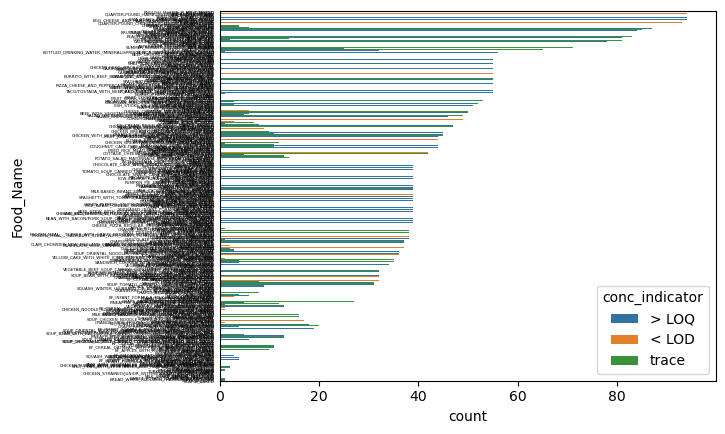

In [102]:
ax = sns.barplot(df_FOM_count.query('Element == "IRON"'), y="Food_Name", x="count", hue="conc_indicator")
ax.tick_params(axis='y', labelsize = 3, size = 0.1)

Can we do a year trend for cadmium in spinach?

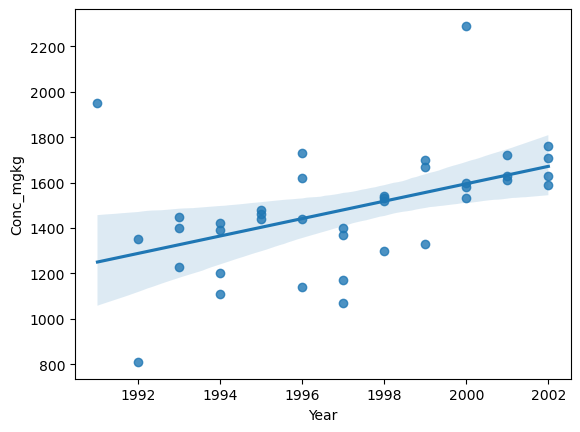

In [211]:
sns.regplot(df_select.query('Food_Name == "BANANAS_WITH_TAPIOCA_STRAINED/JUNIOR" and Element == "POTASSIUM"'),
                x = "Year",
                y = "Conc_mgkg",
                #hue = "Method",
               );

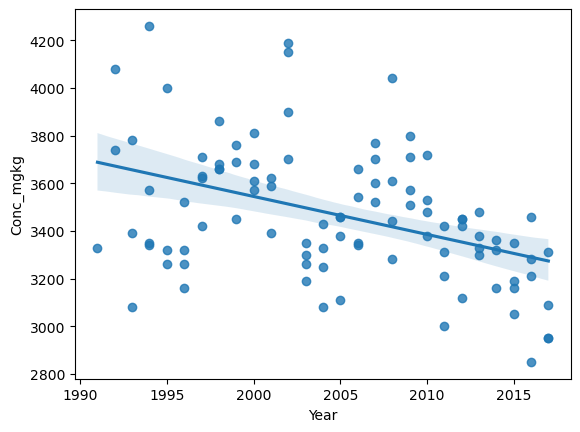

In [123]:
sns.regplot(df_select.query('Food_Name == "BANANA_RAW" and Element == "POTASSIUM"'),
                x = "Year",
                y = "Conc_mgkg",
                #hue = "Method",
               );

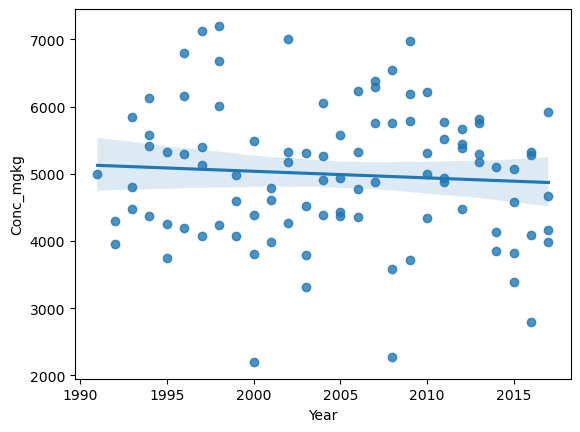

In [118]:
sns.regplot(df_select.query('Food_Name == "AVOCADO_RAW" and Element == "POTASSIUM"'),
                x = "Year",
                y = "Conc_mgkg",
                #hue = "Method",
               );

Plots!

<Axes: xlabel='Year', ylabel='Conc_mgkg'>

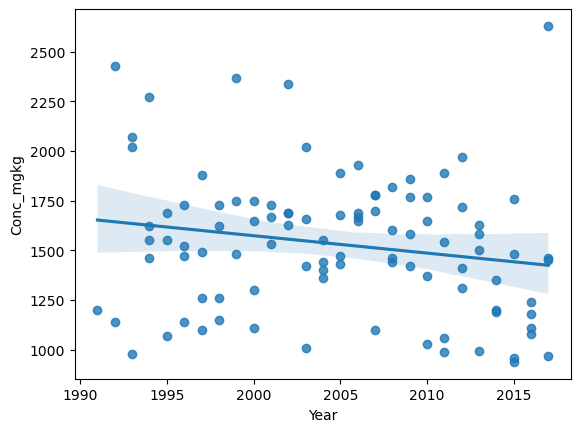

In [116]:
sns.regplot(df_select.query('Food_Name == "SUMMER_SQUASH_FRESH/FROZEN_BOILED" and Element == "POTASSIUM"'),
                x = "Year",
                y = "Conc_mgkg",
                #hue = "Method",
               );

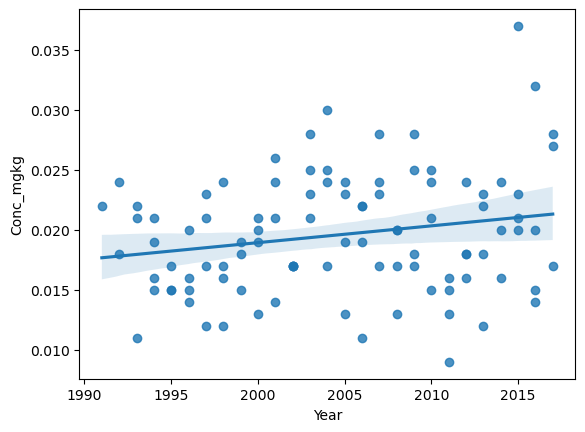

In [124]:
sns.regplot(df_select.query('Food_Name == "TORTILLA_FLOUR" and Element == "CADMIUM"'),
                x = "Year",
                y = "Conc_mgkg",
                #hue = "Method",
               );

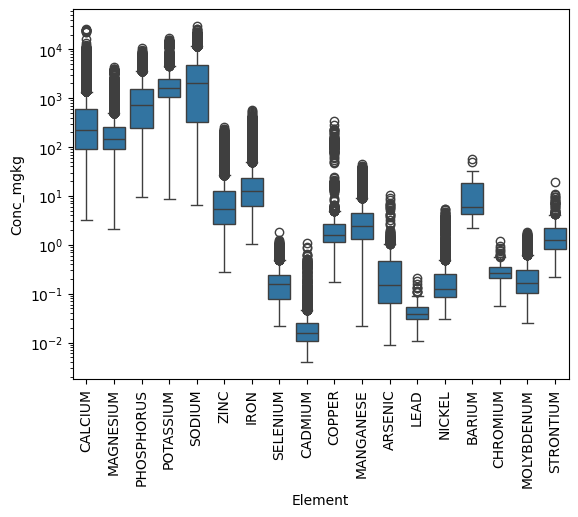

In [103]:
ax = sns.boxplot(df_select.query('Conc_mgkg > LOQ'), x='Element', y = 'Conc_mgkg')
ax.set_yscale("log")
ax.tick_params(axis='x', rotation=90)